# Defining a target with multiple stocks
## Goal
* Quantify how good our models have to be if we have one model for each stock in Dow Jones
* In this set up, each model is trying to predict if the asset is going to be higher in exactly 20 mins when compared to the next minute.
* Need to also track the percentage of succesfull moves, maybe from market utilities.

## Main takeouts



In [7]:
cd ~/Desktop/MyProjects/moneyManager/

/Users/lduque/Desktop/myProjects/moneyManager


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from modelBenchMark.strategySimulator import strategySimulator, simulateSingleStrategy
from modelBenchMark.strategySimulator import getGainOfOnlyOneStockStrategy
from marketUtilities.marketSimulator import marketSimulator
from modeling.createTarget import createTarget
from datetime import datetime

In [9]:
startDay, endDay = datetime(2019,1,1), datetime(2020,1,1)
stocks=['GS', 'MSFT', 'IBM'] 
numSimulations = 150

In [10]:
stratOutcome, stratMoves, stratPosIncreases = strategySimulator(0.45, 0.05, stocks, startDay, endDay, createTarget, numSimulations)
benchMark = np.mean([getGainOfOnlyOneStockStrategy(s, startDay, endDay) for s in stocks])

......................................................................................................................................................

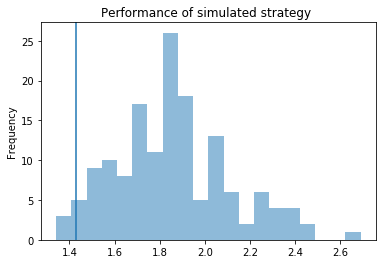

In [11]:
pd.Series(stratOutcome).plot.hist(bins=20, alpha=0.5);
plt.title('Performance of simulated strategy ')
plt.axvline(x=benchMark)

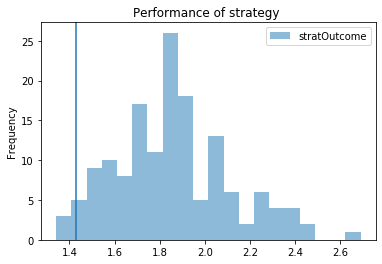

In [12]:
dr = pd.DataFrame({'stratOutcome':stratOutcome})
dr.plot.hist(bins=20, alpha=0.5);
plt.title('Performance of strategy ')
plt.axvline(x=benchMark)

In [13]:
dm = pd.DataFrame({'stratMoves':stratMoves, 'randMoves': randMoves})
dm.plot.hist(bins=20, alpha=0.5);
plt.title('Number of movements')

NameError: name 'randMoves' is not defined

In [ ]:
dm = pd.DataFrame({'stratPosIncreases':stratPosIncreases, 'randPosIncreases': randPosIncreases})
dm.plot.hist(bins=20, alpha=0.5);
plt.title('Percentage of positive increases')

In [ ]:
# just checks how was the gain of GS, IBM, MSFT


In [ ]:
difference = dr.stratOutcome-dr.randOutcome
difference.plot.hist()

In [ ]:
# just playing
from marketUtilities.loadTimeSeries import loadTimeSeries
barSeries = loadTimeSeries('GS', datetime(2019,1,1), datetime(2020,1,1))
t = createTarget(barSeries)
(t.value_counts()/len(t)).plot.bar()

In [ ]:
(t.value_counts()/len(t))